In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

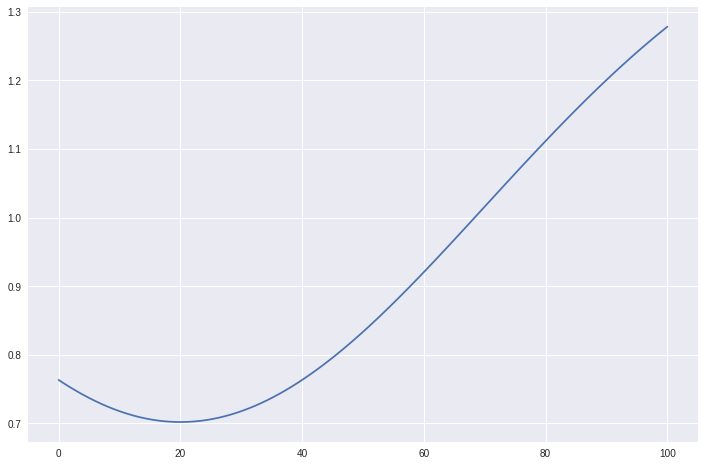

In [9]:
import scipy.stats as ss

x = np.linspace(0, 100, 100)
mu = 20
sigma = 50

y_pdf = (1-ss.norm.pdf(x, mu, sigma)*100)+.5
# my age function

plt.plot(x, y_pdf, label='pdf')

In [10]:
columns = ['Age', 'Smoker', 'Gender', 'BMI', 'Diabetic', 'Cost', 'Fraud']
df = pd.DataFrame (columns=columns)
df

,Age,Smoker,Gender,BMI,Diabetic,Cost,Fraud


In [11]:
import random
import math

def add_fraud_row(df, fraud):
    mean=9596
    age = random.randint(1, 100)
    smoker = int(random.randint(0,10)%10 < 3)
    gender = random.randint(0, 1)
    bmi = random.randint(5, 45)
    diabetic = int(random.randint(0,10)%10 < 2)
    row = []
    row.append(age)
    row.append(smoker)
    row.append(gender)
    row.append(bmi)
    row.append(diabetic)
    cost=((mean*(1-ss.norm.pdf(age, 20, 50)*100)+.5) + 
          (smoker*mean*2) + 
          (gender*mean*0.25)+ 
          (bmi*mean*.01) + 
          (diabetic * mean*.75))
    random_cost=max(np.random.normal(cost, 100), 0)
    if(fraud == 1):
        random_cost *= 2
    row.append(random_cost)
    row.append(fraud)
    df.loc[len(df)] = row
    return df

In [12]:
for x in range(100000):
    df = add_fraud_row(df, 0)
for x in range(1000):
    df = add_fraud_row(df,1)

In [13]:
df = df.reindex(np.random.permutation(df.index))
df.head()

,Age,Smoker,Gender,BMI,Diabetic,Cost,Fraud
64107,60.0,1.0,0.0,40.0,0.0,27149.008301,0.0
81435,22.0,0.0,1.0,26.0,0.0,6828.550440,0.0
22431,59.0,0.0,1.0,34.0,1.0,17030.491415,0.0
15782,93.0,1.0,0.0,30.0,1.0,36058.006160,0.0
48747,30.0,1.0,1.0,9.0,0.0,24338.101158,0.0


In [14]:
df.shape

(101000, 7)

In [15]:
df.to_csv('medical_insurance_fraud_train.csv')

In [16]:
columns = ['Age', 'Smoker', 'Gender', 'BMI', 'Diabetic', 'Cost', 'Fraud']
df_ = pd.DataFrame (columns=columns)
df_

,Age,Smoker,Gender,BMI,Diabetic,Cost,Fraud


In [17]:
for x in range(30000):
    df_ = add_fraud_row(df_, 0)
for x in range(300):
    df_ = add_fraud_row(df_, 1)

In [18]:
df_ = df_.reindex(np.random.permutation(df_.index))
df_.head()

,Age,Smoker,Gender,BMI,Diabetic,Cost,Fraud
22761,52.0,0.0,1.0,17.0,0.0,7349.636127,0.0
21918,27.0,1.0,1.0,33.0,0.0,26874.206884,0.0
29117,11.0,1.0,0.0,30.0,1.0,31185.722038,0.0
23035,19.0,1.0,1.0,9.0,1.0,31575.084841,0.0
12195,65.0,0.0,0.0,10.0,0.0,5542.750893,0.0


In [19]:
df_.shape

(30300, 7)

In [20]:
df_.to_csv('medical_insurance_fraud_test.csv')